In [1]:
#お題①

In [2]:
#29,30ページにしたがったデータの読み込み。欠損値をNAに置換。

In [3]:
#csvの読み込み
df <- read.table("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",header= FALSE,sep =',')

#列名の変更
colnames(df) <- c("pregnant","glucose","diastolic_BP","subcutaneous_fat","serum_insulin","BMI"
                  ,"diabetes pedigree function","age","Diabetes")                 #9つの変数
head(df) 

,pregnant,glucose,diastolic_BP,subcutaneous_fat,serum_insulin,BMI,diabetes pedigree function,age,Diabetes
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [4]:
df_original <- df
df$glucose[df$glucose == 0] <- NA                    #glucoseの値が0ならNA
df$diastolic_BP[df$diastolic_BP == 0] <- NA          #diastolic_BPの値が0ならNA
df$subcutaneous_fat[df$subcutaneous_fat == 0] <- NA  #subcutaneous_fatの値が0ならNA
df$serum_insulin[df$serum_insulin == 0] <- NA        #serum_insulin の値が0ならNA
df$BMI[df$BMI == 0] <- NA                            #BMIの値が0ならNA

In [5]:
#naniarというパッケージをインポート

install.packages("naniar")
library(naniar)

also installing the dependencies ‘gridExtra’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [7]:
#データのスキミング（p44）summaryよりも詳しく表示
install.packages("skimr")
library(skimr)
skimr::skim(df)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error: package or namespace load failed for ‘skimr’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘pillar’ 1.6.1 is already loaded, but >= 1.6.4 is required


In [8]:
#欠測、欠損の集計と可視化(p45)

#欠損値の数と割合
naniar::miss_var_summary(df)

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
serum_insulin,374,48.6979167
subcutaneous_fat,227,29.5572917
diastolic_BP,35,4.5572917
BMI,11,1.4322917
glucose,5,0.6510417
pregnant,0,0.0000000
diabetes pedigree function,0,0.0000000
age,0,0.0000000
Diabetes,0,0.0000000


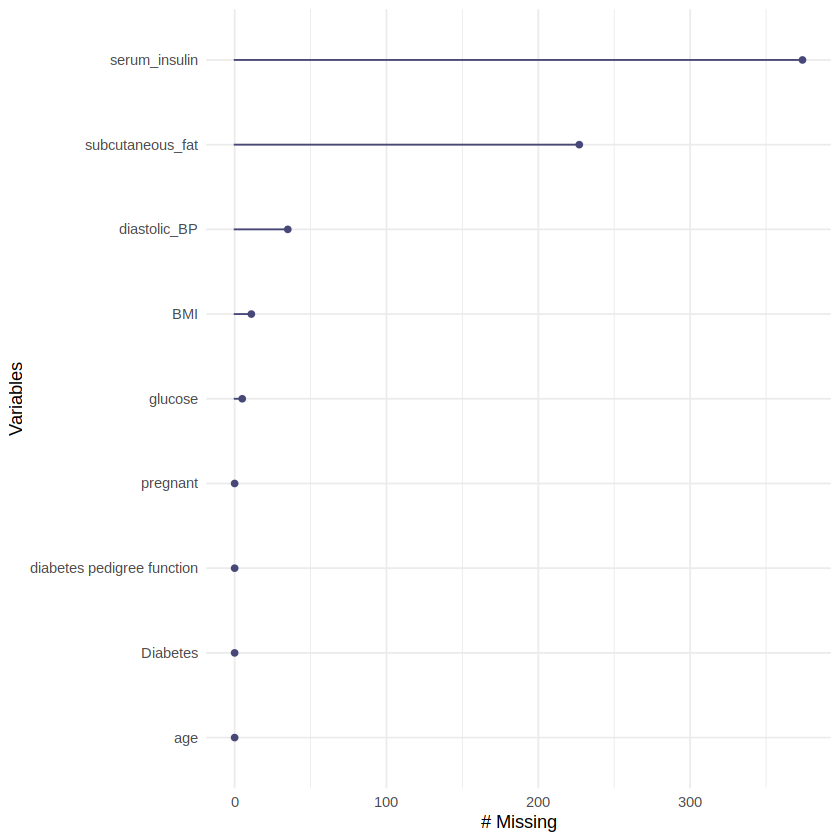

In [9]:
#変数の欠損値割合を比較する
naniar::gg_miss_var(df)

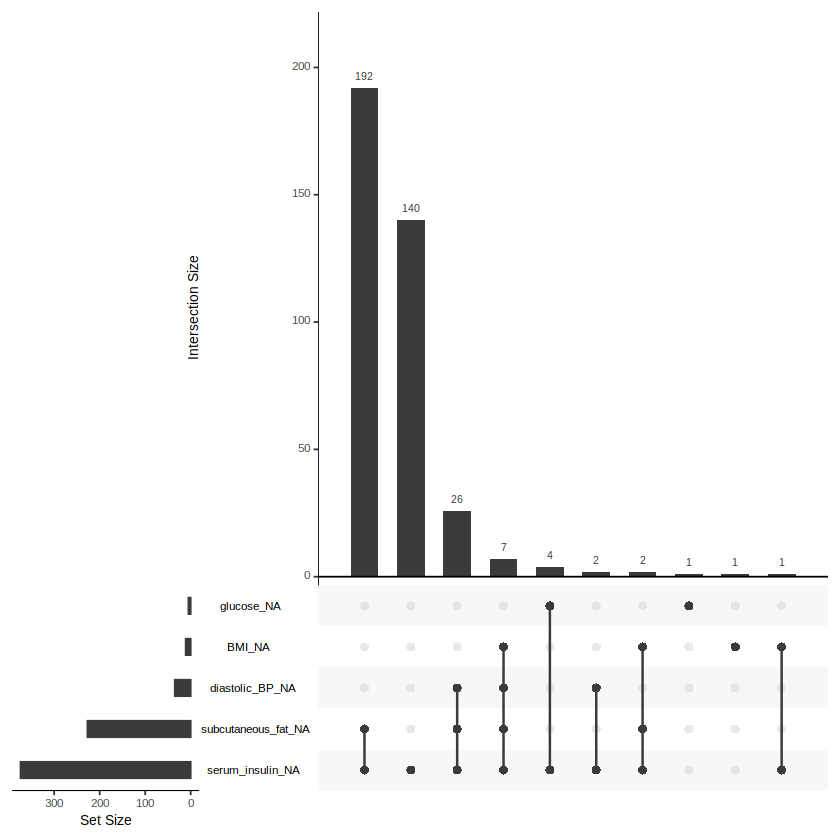

In [10]:
#変数の組み合わせごとの欠損(p47)
naniar::gg_miss_upset(df)

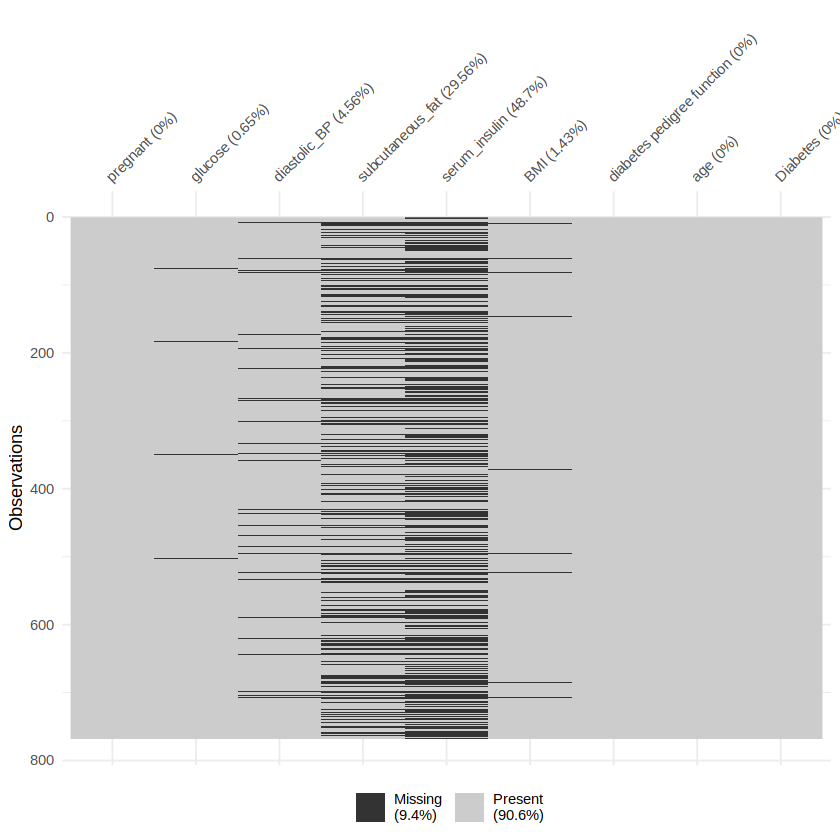

In [11]:
#欠損パターンの可視化(p48)
naniar::vis_miss(df)

In [12]:
#お題②

In [13]:
#K近傍（kNN）代入法(p31)
x <- installed.packages()
if(any(x[,1] == 'vim') == FALSE){
    system("add-apt-repository -y ppa:c2d4u.team/c2d4u4.0+") 
    system("apt-get update") 
    system("apt-get install r-cran-vim") 
}
library(VIM)
df_knn <- kNN(df[,1:8],
              k =5,
              imp_var = FALSE)

Warning message in system("add-apt-repository -y ppa:c2d4u.team/c2d4u4.0+"):
“error in running command”


ERROR: Error in library(VIM): there is no package called ‘VIM’


In [14]:
skimr::skim(df_knn)

ERROR: Error in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]): namespace ‘pillar’ 1.6.1 is already loaded, but >= 1.6.4 is required


In [15]:
#missForest代入法(p31)
install.packages("missForest")
library(missForest)
set.seed(1234)
res <- missForest(df[, 1:8])
df_missForest <- res$ximp

also installing the dependencies ‘rngtools’, ‘itertools’, ‘doRNG’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [16]:
skimr::skim(df_missForest)

ERROR: Error in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]): namespace ‘pillar’ 1.6.1 is already loaded, but >= 1.6.4 is required


In [ ]:
#お題③

In [17]:
#ggplot2の読み込み
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [18]:
df_missForest$Outcome <- df$Diabetes
head(df_missForest)

,pregnant,glucose,diastolic_BP,subcutaneous_fat,serum_insulin,BMI,diabetes pedigree function,age,Outcome
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35.00,195.050,33.6,0.627,50,1
2,1,85,66,29.00,77.075,26.6,0.351,31,0
3,8,183,64,23.17,237.400,23.3,0.672,32,1
4,1,89,66,23.00,94.000,28.1,0.167,21,0
5,0,137,40,35.00,168.000,43.1,2.288,33,1
6,5,116,74,25.96,118.840,25.6,0.201,30,0


also installing the dependencies ‘TSP’, ‘qap’, ‘cluster’, ‘gclus’, ‘ca’, ‘registry’, ‘ggrepel’, ‘seriation’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Correlation computed with
* Method: 'pearson'
* Missing treated using: 'pairwise.complete.obs'



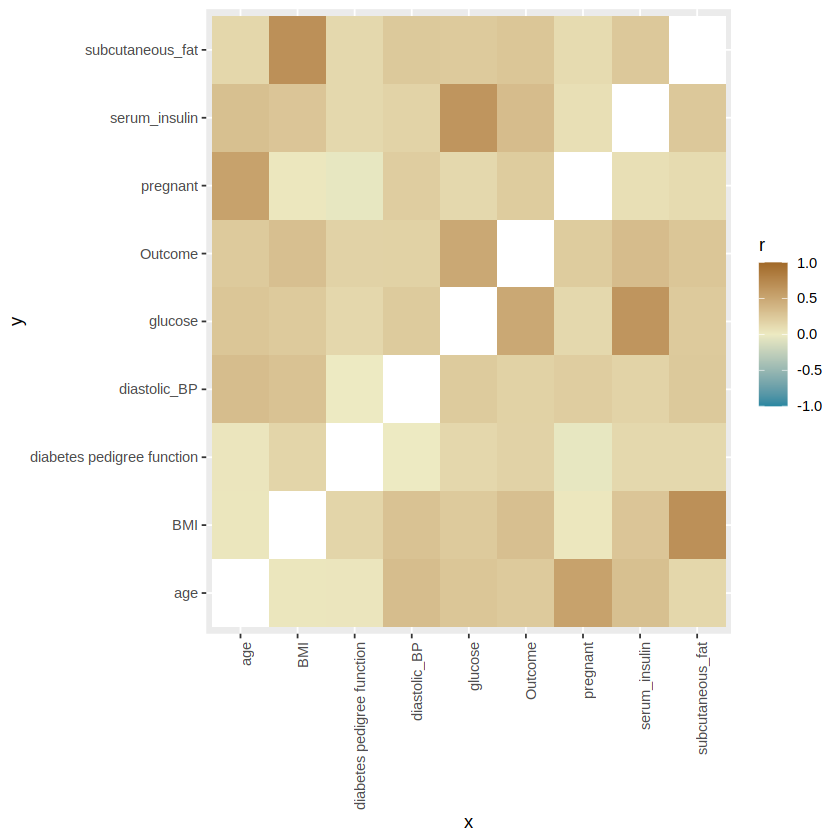

In [19]:
#相関ヒートマップ(p51)
install.packages("corrr")
install.packages("rcartocolor")
df_missForest %>% 
  select_if(is.numeric) %>% 
  corrr::correlate() %>%
  corrr::stretch() %>% 
  ggplot() +
  geom_tile(aes(x = x, y = y, fill = r)) +
  rcartocolor::scale_fill_carto_c(palette = "Earth", direction = -1,
                                 limits = c(-1, 1),breaks = seq(-1, 1, 0.5),
                                 na.value = "white") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


Correlation computed with
* Method: 'pearson'
* Missing treated using: 'pairwise.complete.obs'



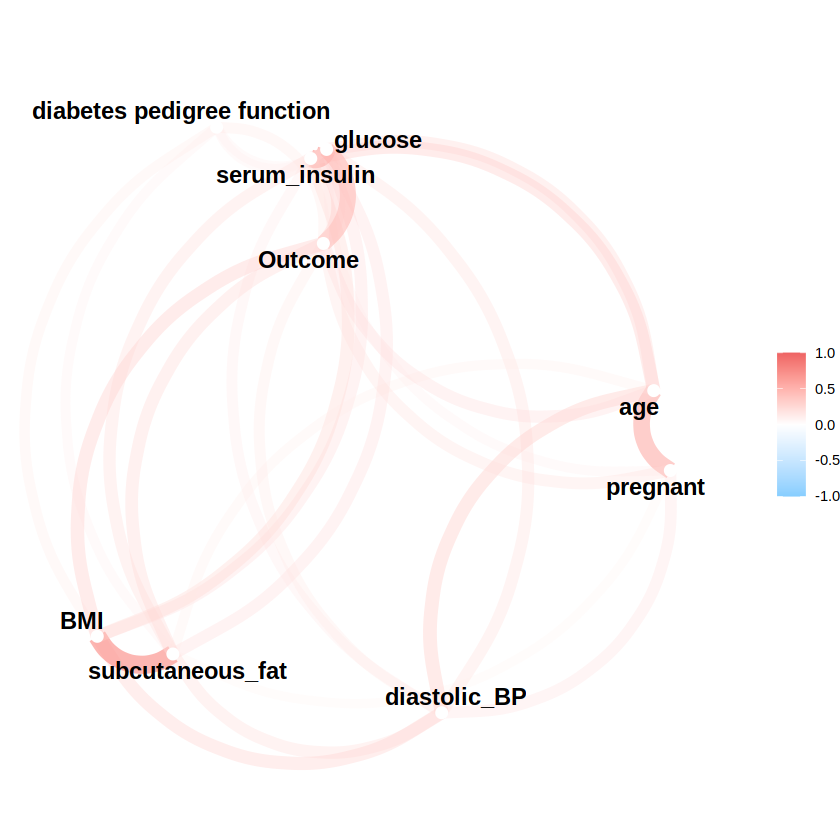

In [20]:
#相関ネットワーク(p51)
df_missForest %>%                                    
  select_if(is.numeric) %>%
  corrr::correlate() %>%
  corrr::network_plot(min_cor = 0.1,
                      colours = c("skyblue1", "white", "indianred2"))